In [1]:
import numpy as np
from numpy.linalg import norm
from numpy.random import random_integers, uniform, randn
import imageio
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.misc import imread, imsave

plt.rcParams['figure.figsize'] = (16,8)

# Problem 1

In [2]:
a, b = -1, 1.
alpha, beta = 1., 7.

#### Define variables x_steps, final_T, time_steps ####
x_steps = 20
final_T = .2
time_steps = 250


delta_t, delta_x = final_T/time_steps, (b-a)/x_steps
x0 = np.linspace(a,b,x_steps+1)

In [3]:
# Check a stability condition for this numerical method
if delta_t/delta_x**2. > .5:
    print("stability condition fails")
    
u = np.empty((2,x_steps+1))
u[0] = (beta - alpha)/(b-a)*(x0-a) + alpha
u[1] = (beta - alpha)/(b-a)*(x0-a) + alpha

In [4]:
def rhs(y):
    # Approximate first and second derivatives to second order accuracy.
    yp = (np.roll(y,-1) - np.roll(y,1))/(2.*delta_x)
    ypp = (np.roll(y,-1) - 2.*y + np.roll(y,1))/delta_x**2.
    # Find approximation for the next time step, using a first order Euler step
    y[1:-1] -= delta_t*(1. + yp[1:-1]**2. - 1.*y[1:-1]*ypp[1:-1])

# Time step until successive iterations are close
iteration = 0
while iteration < time_steps:
    # update u[1] with right hand side caluclation
    rhs(u[1])
    
    # Check for convergence
    if norm(np.abs((u[0] - u[1]))) < 1e-5: break
    
    # If not, continue
    u[0] = u[1]
    iteration+=1
    
# Print results
print("Difference in iterations is ", norm(np.abs((u[0] - u[1]))))
print("Final time = ", iteration*delta_t)

Difference in iterations is  0.0
Final time =  0.2


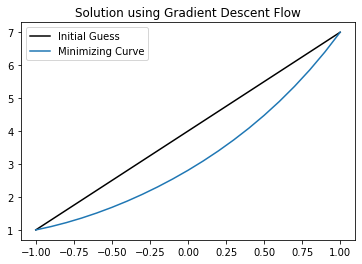

In [5]:
# Plot the original guess
plt.plot(x0,(beta - alpha)/(b-a)*(x0-a) + alpha,'k',label="Initial Guess")
# Plot the final result
plt.plot(x0,u[1],label="Minimizing Curve")
plt.title("Solution using Gradient Descent Flow")
plt.legend()
plt.show()

# Problem 2

In [10]:
imagename = 'balloons_bw.jpg'
changed_pixels=40000

# Read the image file imagename into an array of numbers, IM
# Multiply by 1. / 255 to change the values so that they are floating point
# numbers ranging from 0 to 1.

# Read in image and take a copy
IM = imread(imagename, mode="L") * (1. / 255)
OG_IM = IM.copy()
IM_x, IM_y = IM.shape

# Change a given number of pixels as defined in the pdf
for lost in range(changed_pixels):
    x_,y_ = random_integers(1,IM_x-2), random_integers(1,IM_y-2)
    val = .1*randn() + .5
    IM[x_,y_] = max( min(val,1.), 0.)
imsave("noised_"+imagename, IM)



C:\Users\hayde\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':
C:\Users\hayde\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: This function is deprecated. Please call randint(1, 798 + 1) instead
  from ipykernel import kernelapp as app
C:\Users\hayde\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: This function is deprecated. Please call randint(1, 598 + 1) instead
  from ipykernel import kernelapp as app
C:\Users\hayde\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


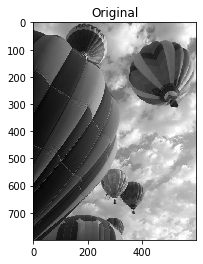

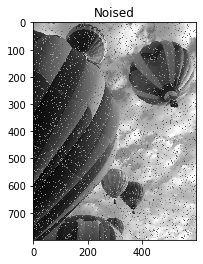

In [7]:
# Show image
plt.imshow(OG_IM, cmap="gray")
plt.title("Original")
plt.show()

# Show noisy image
plt.imshow(IM,cmap="gray")
plt.title("Noised")
plt.show()

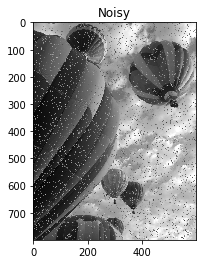

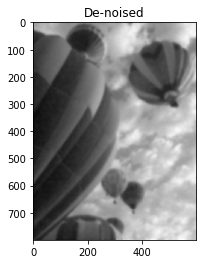

In [8]:
# Set up variables
dt = 1e-3
lam = 40
xn = IM_x
yn = IM_y
steps_time = 250

# Load the desired image and original copy
u = IM.copy()
f = IM

# Iterate through given timesteps
for _ in range(steps_time):
    # Compute u_xx
    u_xx = np.roll(u,-1,axis=1) - 2*u + np.roll(u,1,axis=1)
    # Compute u_yy
    u_yy = np.roll(u,-1,axis=0) - 2*u + np.roll(u,1,axis=0)
    # Use u_xx, u_yy to compute u_t
    ut = dt * (f - u + lam * (u_xx + u_yy))[1:-1,1:-1]
    
    # update one time step
    u[1:-1,1:-1] += ut

# Show results
plt.imshow(f,cmap="gray")
plt.title("Noisy")
plt.show()

plt.imshow(u,cmap="gray")
plt.title("De-noised")
plt.show()

    

# Problem 3

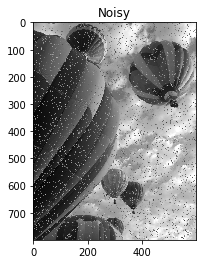

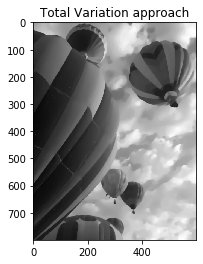

In [42]:
# Define parameters
dt = 1e-3
eps = 1e-6
steps_time = 200

u = f.copy()
# lambda, dx, dy == 1 means they don't need to be included in rhs

for _ in range(steps_time):
    # Calculate u_x, u_y, u_xx, u_yy, and u_xy
    u_x = (np.roll(u,-1,axis=1) - np.roll(u,1,axis=1))/2
    u_xx = np.roll(u,-1,axis=1) - 2*u + np.roll(u,1,axis=1)
    u_xy = (np.roll(u_x,-1,axis=0) - np.roll(u_x,1,axis=0))/2
    u_y = (np.roll(u,-1,axis=0) - np.roll(u,1,axis=0))/2
    u_yy = np.roll(u,-1,axis=0) - 2*u + np.roll(u,1,axis=0)
   
    
    # Combine the above to calculate the next time step
    ut = dt * (-(u-f) + (u_xx * u_y**2 + u_yy * u_x**2 - 2 * u_x * u_y * u_xy)/np.power(u_x**2 + u_y**2 + eps,3/2))[1:-1,1:-1]
    u[1:-1,1:-1] += ut
    
    
plt.imshow(f,cmap="gray")
plt.title("Noisy")
plt.show()

plt.imshow(u,cmap="gray")
plt.title("Total Variation approach")
plt.show()